In [5]:
import numpy as np
import phate
import scprep
import pandas as pd
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../src')
from preprocess import get_data_dict

In [6]:
data_all = np.load("../data/old2/eb_subset.npz")
data_dict = {name: data_all[name] for name in data_all.files}

/tmp/ipykernel_231201/2664223154.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(data_dict['phate'], c=data_dict['colors'], cmap='Spectral', figsize=(8, 6))


<Axes: >

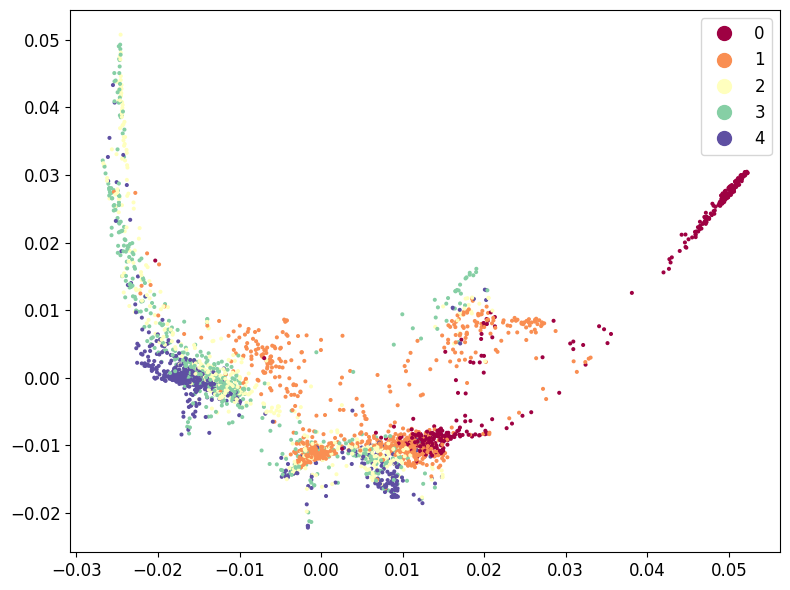

In [7]:
phate.plot.scatter2d(data_dict['phate'], c=data_dict['colors'], cmap='Spectral', figsize=(8, 6))

In [8]:
X = data_dict['data']
colors = data_dict['colors']

In [9]:
ids = np.arange(0, X.shape[0])
X_train, X_test, color_train, color_test, id_train, id_test = train_test_split(X, colors, ids, test_size=0.2, random_state=42)

In [10]:
is_train = np.isin(ids, id_train)

In [11]:
data_dict['is_train'] = is_train

<Axes: >

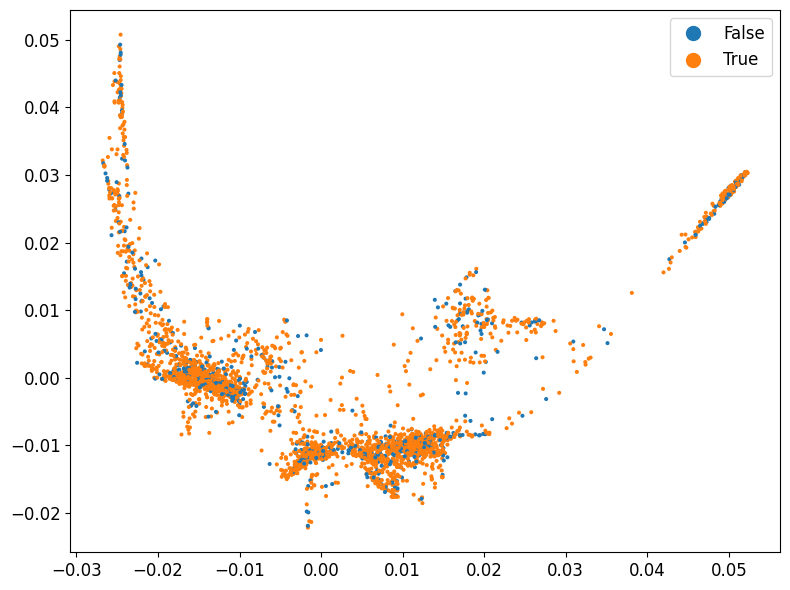

In [12]:
scprep.plot.scatter2d(data_dict['phate'], c=is_train, figsize=(8, 6))

<Axes: >

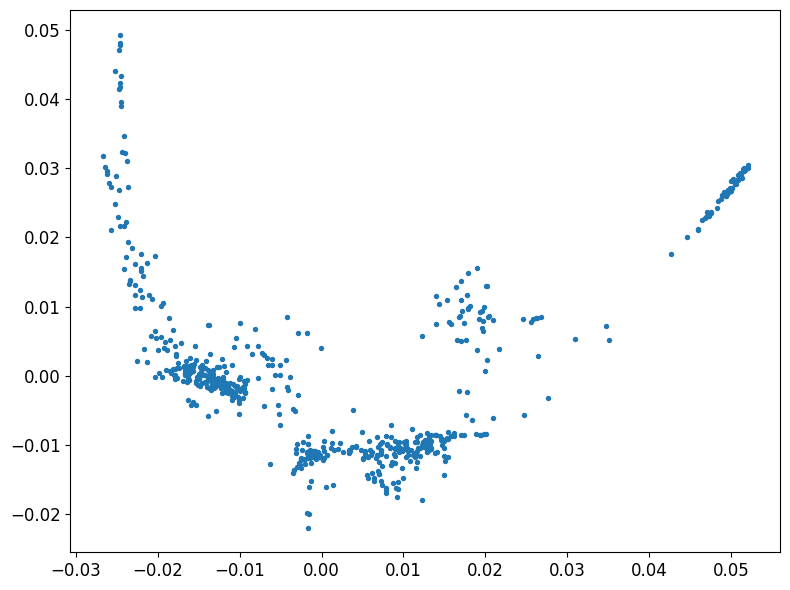

In [13]:
scprep.plot.scatter2d(data_dict['phate'][id_test], figsize=(8, 6))

In [14]:
data_dict_train = get_data_dict(X_train, color_train)

Calculating PHATE...
  Running PHATE on 2400 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.40 seconds.
    Calculating affinities...
    Calculated affinities in 1.07 seconds.
  Calculated graph and diffusion operator in 1.49 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.32 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.69 seconds.
  Calculated landmark operator in 3.88 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.96 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.73 seconds.
Calculated PHATE in 9.07 seconds.


<Axes: >

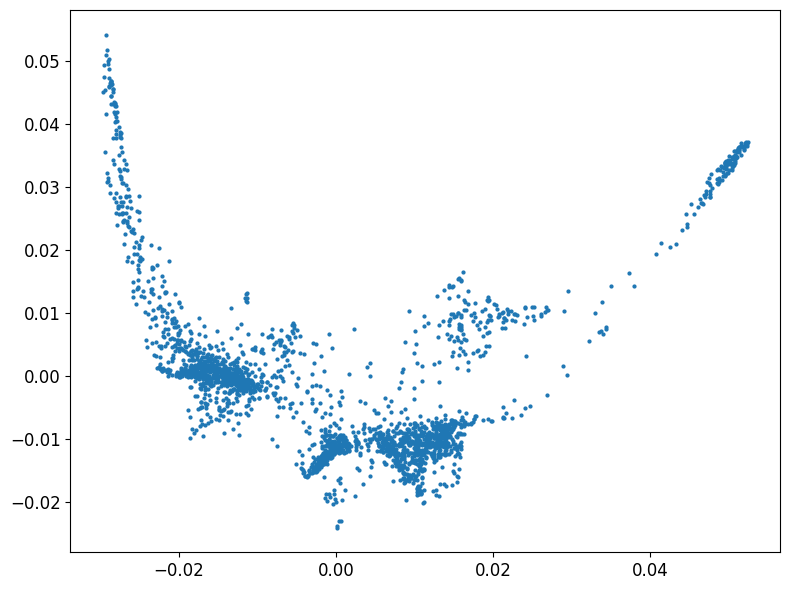

In [15]:
scprep.plot.scatter2d(data_dict_train['phate'], figsize=(8, 6))

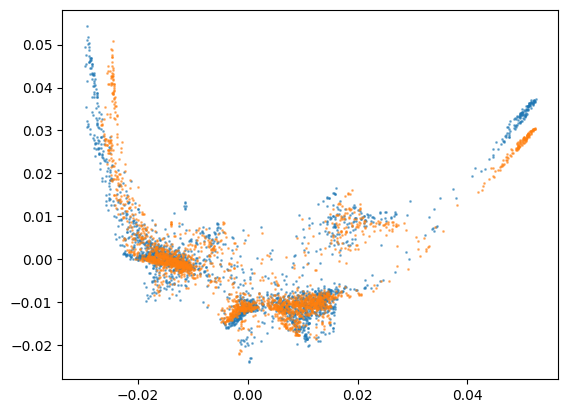

In [16]:
import matplotlib.pyplot as plt
plt.scatter(*data_dict_train['phate'].T, alpha=0.5, s=1)
plt.scatter(*data_dict['phate'][id_train].T, alpha=0.5, s=1)

In [17]:
np.savez('../data/eb_subset_all.npz', **data_dict)

In [18]:
np.savez('../data/eb_subset.npz', **data_dict_train)

In [19]:
data_dict_test = dict(
    data=X_test,
    colors=color_test,
    dist=np.zeros((X_test.shape[0], X_test.shape[0]))*np.nan,
    phate=data_dict['phate'][id_test]
)

In [20]:
np.savez('../data/eb_subset_test.npz', **data_dict_test)

<Axes: >

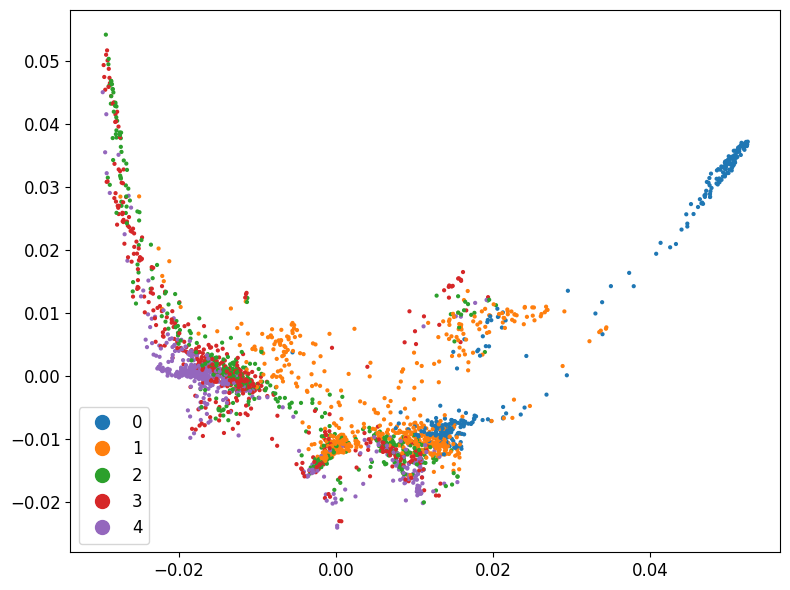

In [22]:
scprep.plot.scatter2d(data_dict_train['phate'], c=data_dict_train['colors'], figsize=(8, 6))